In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
# import matplotlib
# matplotlib.use("Agg")
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack
import fitsio
# from astropy.io import fits

In [2]:
cat = Table.read('/Users/rongpu/Downloads/c3r2_DR1+DR2_2019april11.txt', format='ascii')
print(len(cat))
print(len(cat), len(np.unique(cat['ID'])), len(cat)-len(np.unique(cat['ID'])))
cat['my_id'] = np.arange(len(cat))

4525
4525 3888 637


In [3]:
cat[:5]

ID,RAh,RAm,RAs,DE-,DEd,DEm,DEs,Mask,Slit,imag,zspec,Qual,Instrument,spec1dfile,my_id
,h,min,s,,deg,arcmin,arcsec,,,mag,,,,,
str14,int64,int64,float64,str1,int64,int64,float64,str13,int64,float64,float64,float64,str7,str48,int64
UDS-3583,2,17,30.65,-,5,15,24.4,UDS-m1n1,1,23.4,0.7877,4.0,DEIMOS,spec1d.u-m1n1.001.UDS-3583.fits,0
UDS-10246,2,17,17.55,-,5,13,6.9,UDS-m1n1,2,23.9,0.8028,4.0,DEIMOS,spec1d.u-m1n1.002.UDS-10246.fits,1
UDS-767,2,17,59.05,-,5,16,21.2,UDS-m1n1,3,25.0,0.5558,4.0,DEIMOS,spec1d.u-m1n1.003.UDS-767.fits,2
UDS-7109,2,17,0.35,-,5,14,15.4,UDS-m1n1,4,23.6,1.0314,3.0,DEIMOS,spec1d.u-m1n1.004.UDS-7109.fits,3
UDS-2276,2,17,52.83,-,5,15,55.2,UDS-m1n1,5,22.9,0.9388,4.0,DEIMOS,spec1d.u-m1n1.005.UDS-2276.fits,4


In [27]:
cat['ra'] = np.array(cat['RAh']*15 + cat['RAm']/4. + cat['RAs']/240.)
cat['dec'] = np.array(cat['DEd'] + cat['DEm']/60. + cat['DEs']/3600.)
cat['dec'][cat['DE-']=='-'] *= -1

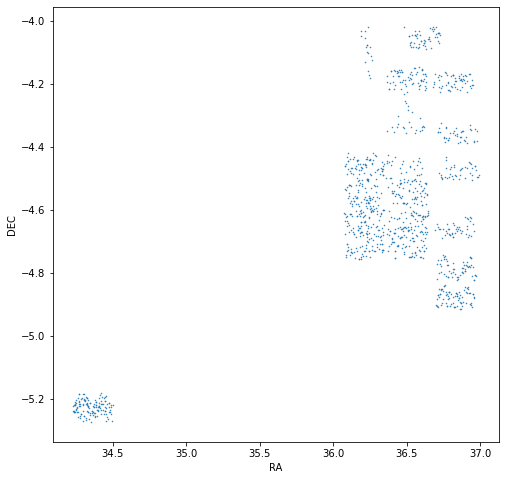

In [28]:
# VI to make sure that the RA and DEC are correct
mask = (cat['ra']<50)
plt.figure(figsize=(8, 8))
plt.plot(cat['ra'][mask], cat['dec'][mask], '.', markersize=1, alpha=1)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

t = Table()
t['RA'] = cat['ra'][mask]
t['DEC'] = cat['dec'][mask]
t.write('/Users/rongpu/Downloads/visual_inspection.fits', overwrite=True)

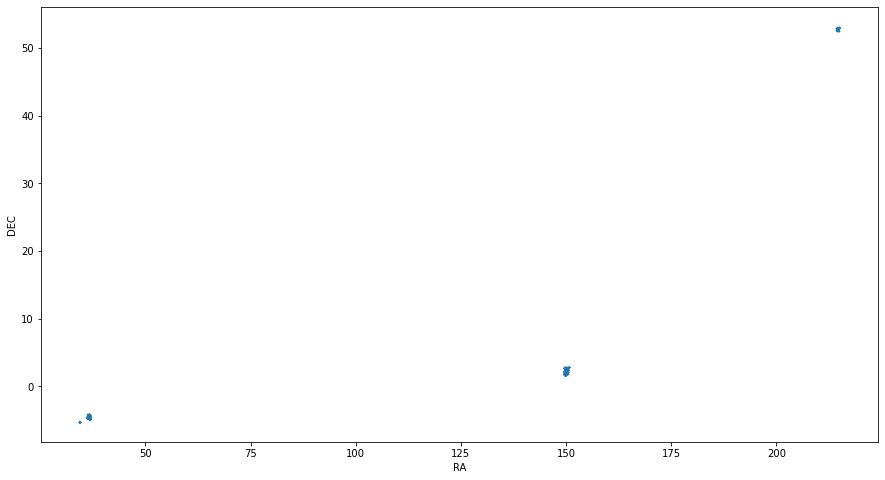

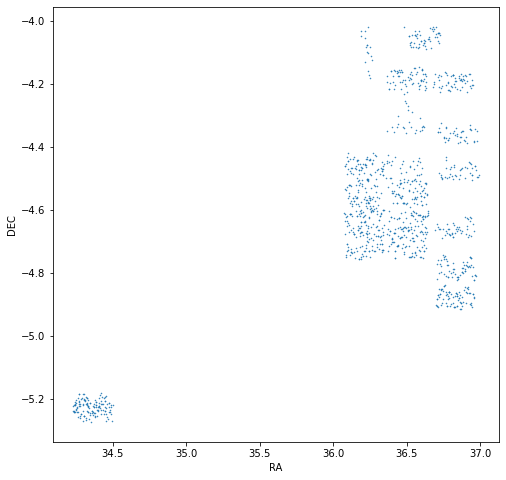

In [6]:
plt.figure(figsize=(15, 8))
plt.plot(cat['ra'], cat['dec'], '.', markersize=0.4, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

mask = cat['ra']<50
plt.figure(figsize=(8, 8))
plt.plot(cat['ra'][mask], cat['dec'][mask], '.', markersize=1, alpha=1)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

In [7]:
cat

ID,RAh,RAm,RAs,DE-,DEd,DEm,DEs,Mask,Slit,imag,zspec,Qual,Instrument,spec1dfile,my_id,ra,dec
,h,min,s,,deg,arcmin,arcsec,,,mag,,,,,,h,deg
str14,int64,int64,float64,str1,int64,int64,float64,str13,int64,float64,float64,float64,str7,str48,int64,float64,float64
UDS-3583,2,17,30.65,-,5,15,24.4,UDS-m1n1,1,23.4,0.7877,4.0,DEIMOS,spec1d.u-m1n1.001.UDS-3583.fits,0,34.37770833333333,-5.256777777777778
UDS-10246,2,17,17.55,-,5,13,6.9,UDS-m1n1,2,23.9,0.8028,4.0,DEIMOS,spec1d.u-m1n1.002.UDS-10246.fits,1,34.323125,-5.218583333333333
UDS-767,2,17,59.05,-,5,16,21.2,UDS-m1n1,3,25.0,0.5558,4.0,DEIMOS,spec1d.u-m1n1.003.UDS-767.fits,2,34.49604166666666,-5.272555555555556
UDS-7109,2,17,0.35,-,5,14,15.4,UDS-m1n1,4,23.6,1.0314,3.0,DEIMOS,spec1d.u-m1n1.004.UDS-7109.fits,3,34.25145833333333,-5.237611111111111
UDS-2276,2,17,52.83,-,5,15,55.2,UDS-m1n1,5,22.9,0.9388,4.0,DEIMOS,spec1d.u-m1n1.005.UDS-2276.fits,4,34.470125,-5.265333333333333
UDS-8536,2,17,53.37,-,5,13,40.3,UDS-m1n1,6,24.7,0.8619,4.0,DEIMOS,spec1d.u-m1n1.006.UDS-8536.fits,5,34.472375,-5.227861111111111
UDS-9784,2,17,56.8,-,5,13,15.9,UDS-m1n1,9,23.6,0.8533,4.0,DEIMOS,spec1d.u-m1n1.009.UDS-9784.fits,6,34.486666666666665,-5.2210833333333335
UDS-10739,2,17,44.88,-,5,12,58.7,UDS-m1n1,10,23.2,1.0594,4.0,DEIMOS,spec1d.u-m1n1.010.UDS-10739.fits,7,34.437,-5.2163055555555555


__Check for duplicates__

In [8]:
from __future__ import division, print_function
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.expanduser('~/git/Python/user_modules/'))
import match_coord

291 objects with a nearby neighbor


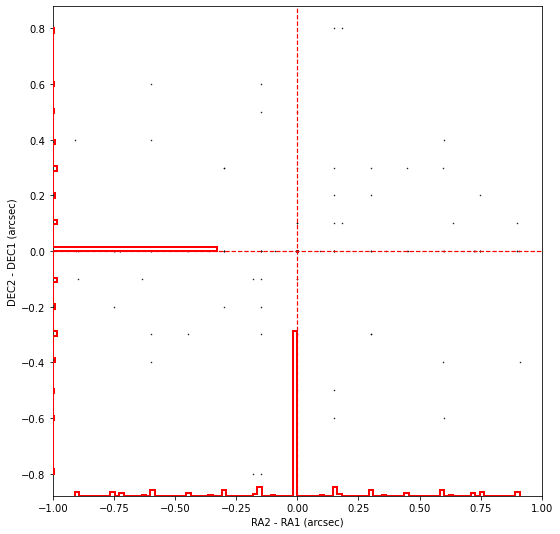

291 6.43%


In [9]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['ra'], cat['dec'], search_radius=1., 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

In [10]:
cat[idx1]

ID,RAh,RAm,RAs,DE-,DEd,DEm,DEs,Mask,Slit,imag,zspec,Qual,Instrument,spec1dfile,my_id,ra,dec
,h,min,s,,deg,arcmin,arcsec,,,mag,,,,,,h,deg
str14,int64,int64,float64,str1,int64,int64,float64,str13,int64,float64,float64,float64,str7,str48,int64,float64,float64
UDS-3711,2,17,12.84,-,5,15,23.1,UDS-m1n1,66,22.6,0.5363,4.0,DEIMOS,spec1d.u-m1n1.066.UDS-3711.fits,47,34.3035,-5.2564166666666665
COSMOS-1242270,10,0,19.37,+,2,19,3.2,COSMOS-m3n1,0,24.3,0.4383,4.0,DEIMOS,spec1d.m3-n1.000.COSMOS-1242270.fits,126,150.08070833333332,2.3175555555555554
COSMOS-1264132,10,0,2.36,+,2,20,16.7,COSMOS-m3n1,36,24.3,0.6663,4.0,DEIMOS,spec1d.m3-n1.036.COSMOS-1264132.fits,150,150.00983333333335,2.3379722222222226
COSMOS-805848,10,0,10.6,+,2,1,41.8,COSMOS-m4-Y,21,23.2,0.6664,3.5,MOSFIRE,spec1d.cos-m4-Y.021.COSMOS-805848.fits,311,150.04416666666665,2.028277777777778
COSMOS-164239,10,0,18.84,+,2,2,44.9,COSMOS-m4-Y,11,20.4,0.667,4.0,MOSFIRE,-1,313,150.0785,2.0458055555555554
COSMOS-406239,9,58,21.32,+,1,44,55.0,COSMOS-m1n2,11,23.1,1.0817,4.0,DEIMOS,spec1d.cos-m1.011.COSMOS-406239.fits,332,149.58883333333333,1.7486111111111111
COSMOS-1048698,9,59,8.42,+,2,15,45.2,COSMOS-m8n2,17,24.4,1.1717,4.0,DEIMOS,spec1d.cos-m8.017.COSMOS-1048698.fits,409,149.78508333333335,2.2625555555555557
COSMOS-1080687,9,58,48.6,+,2,13,5.5,COSMOS-m8n2,86,23.5,1.0642,4.0,DEIMOS,spec1d.cos-m8.086.COSMOS-1080687.fits,451,149.7025,2.2181944444444444


------------
## Remove duplicates

In [11]:
ra_col = 'ra'
dec_col = 'dec'

quality_col = 'Qual'

# perturb the coordinates so that the 2nd closest match won't be itself
np.random.seed(618)
cat['dec_perturb'] = np.array(cat[dec_col], dtype=np.float64) + np.random.rand(len(cat))*(0.001/3600)

# Assign a random number to break the tie
random = np.random.rand(len(cat))

continue_loop = True
loop = 0
while continue_loop:
    
    print('Loop %d'%loop)
    loop = loop+1

    n_duplicates, idx1, idx2 = match_coord.match_self(cat[ra_col], cat['dec_perturb'], search_radius=1., 
                                                      return_indices=True, plot_q=False)
    
    mask = (cat[quality_col][idx1]<cat[quality_col][idx2]) \
                  | ((cat[quality_col][idx1]==cat[quality_col][idx2]) & (random[idx1]<random[idx2]))
    idx_remove = idx1[mask]    
    cat.remove_rows(idx_remove)
    print('{} objects removed'.format(len(idx_remove)))
    
    if n_duplicates==0:
        continue_loop = False

Loop 0
291 objects with a nearby neighbor
145 objects removed
Loop 1
4 objects with a nearby neighbor
2 objects removed
Loop 2
0 objects with a nearby neighbor
0 objects removed


In [12]:
cat.remove_column('dec_perturb')

In [13]:
print(len(cat))

4378


In [14]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['ra'], cat['dec'], search_radius=1., 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

0 objects with a nearby neighbor
0 0.00%


## Check the objects that were removed

In [15]:
cat_original = Table.read('/Users/rongpu/Downloads/c3r2_DR1+DR2_2019april11.txt', format='ascii')
cat_original['my_id'] = np.arange(len(cat_original))
mask = ~np.in1d(cat_original['my_id'], cat['my_id'])
print(len(np.unique(cat_original['ID'][mask])))
cat_original[mask]

104


ID,RAh,RAm,RAs,DE-,DEd,DEm,DEs,Mask,Slit,imag,zspec,Qual,Instrument,spec1dfile,my_id
,h,min,s,,deg,arcmin,arcsec,,,mag,,,,,
str14,int64,int64,float64,str1,int64,int64,float64,str13,int64,float64,float64,float64,str7,str48,int64
UDS-3711,2,17,12.84,-,5,15,23.1,UDS-m1n1,66,22.6,0.5363,4.0,DEIMOS,spec1d.u-m1n1.066.UDS-3711.fits,47
COSMOS-1264132,10,0,2.36,+,2,20,16.7,COSMOS-m3n1,36,24.3,0.6663,4.0,DEIMOS,spec1d.m3-n1.036.COSMOS-1264132.fits,150
COSMOS-805848,10,0,10.6,+,2,1,41.8,COSMOS-m4-Y,21,23.2,0.6664,3.5,MOSFIRE,spec1d.cos-m4-Y.021.COSMOS-805848.fits,311
COSMOS-164239,10,0,18.84,+,2,2,44.9,COSMOS-m4-Y,11,20.4,0.667,4.0,MOSFIRE,-1,313
COSMOS-1048698,9,59,8.42,+,2,15,45.2,COSMOS-m8n2,17,24.4,1.1717,4.0,DEIMOS,spec1d.cos-m8.017.COSMOS-1048698.fits,409
COSMOS-406239,9,58,21.32,+,1,44,55.0,COSMOS-m2n2,6,23.1,1.0815,4.0,DEIMOS,spec1d.cos-m2.006.COSMOS-406239.fits,461
COSMOS-639335,9,58,22.32,+,1,49,14.0,COSMOS-m2n2,72,18.8,0.887,4.0,DEIMOS,spec1d.cos-m2.072.COSMOS-639335.fits,520
COSMOS-628997,9,58,19.83,+,1,53,21.9,COSMOS-m3n2,5,24.4,1.005,4.0,DEIMOS,spec1d.cos-m3.005.COSMOS-628997.fits,610


In [16]:
mask = ~np.in1d(cat_original['my_id'], cat['my_id'])
mask1 = np.in1d(cat['ID'], cat_original['ID'][mask])

In [17]:
np.sum(mask)

147

In [18]:
np.sum(mask1)

593

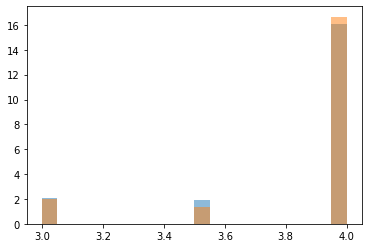

In [19]:
plt.hist(cat_original['Qual'][mask], 20, alpha=0.5, density=True)
plt.hist(cat['Qual'][mask1], 20, alpha=0.5, density=True)
plt.show()

In [20]:
print(len(cat))
print(len(np.unique(cat['ID'])))

4378
3856


In [21]:
t = Table()
t['type'], t['count'] = np.unique(cat['ID'], return_counts=True)
t['frac (%)'] = t['count']/len(cat)*100
t['frac (%)'].format = '%.1f'
t.sort('count')
t

type,count,frac (%)
str14,int64,float64
COS-100,1,0.0
EGS-239643,1,0.0
EGS-240355,1,0.0
EGS-243922,1,0.0
EGS-244799,1,0.0
EGS-245019,1,0.0
EGS-248562,1,0.0
EGS-248670,1,0.0
EGS-255713,1,0.0


In [24]:
mask = t['count']>1
t[mask]

type,count,frac (%)
str14,int64,float64
COSMOS-623200,2,0.0
serendip,522,11.9


In [25]:
mask = cat['ID']=='COSMOS-623200'
cat[mask]

ID,RAh,RAm,RAs,DE-,DEd,DEm,DEs,Mask,Slit,imag,zspec,Qual,Instrument,spec1dfile,my_id,ra,dec
,h,min,s,,deg,arcmin,arcsec,,,mag,,,,,,h,deg
str14,int64,int64,float64,str1,int64,int64,float64,str13,int64,float64,float64,float64,str7,str48,int64,float64,float64
COSMOS-623200,9,58,49.23,+,1,55,36.4,COSMOS-m4n2,22,24.4,1.2694,4.0,DEIMOS,spec1d.cos-m4.022.COSMOS-623200.fits,678,149.705125,1.9267777777777777
COSMOS-623200,10,0,46.42,+,2,14,44.7,COSMOS-1h1,69,24.6,0.6748,4.0,DEIMOS,spec1d.cos1h1.069.COSMOS-623200.fits,3162,150.19341666666668,2.24575
